In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import random
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import graphviz
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
wine_df=pd.read_csv("WineQuality.csv",index_col=0)

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,White Wine
1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32485 entries, 2732 to 5462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 3.5+ MB


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


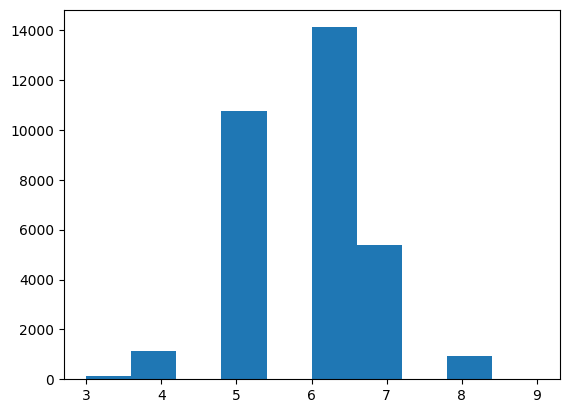

In [ ]:
plt.hist(wine_df['quality']);

In [ ]:
wine_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Type                    False
dtype: bool

In [3]:
wine=pd.get_dummies(wine_df,columns=['Type'])

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_Red Wine,Type_White Wine
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,0,1
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,0,1
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,0,1
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0,1
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,0,1
6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,0,1
1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,0,1
2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,0,1


In [4]:
Y=wine['quality']
X=wine.drop('quality',inplace=False,axis=1)

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type_Red Wine,Type_White Wine
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,0,1
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,0,1
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,0,1
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,0,1
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,0,1
6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,0,1
1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,0,1
2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,0,1


In [5]:
scaler=StandardScaler()

In [6]:
X_norm=scaler.fit_transform(X)

In [ ]:
X_norm

array([[ 0.14161795, -1.0316074 , -0.19513894, ..., -0.06777317,
        -0.57312028,  0.57312028],
       [-1.46364672, -0.18265712,  0.4249084 , ...,  1.02407377,
        -0.57312028,  0.57312028],
       [-1.92229377, -1.18320566, -0.19513894, ...,  0.68812087,
        -0.57312028,  0.57312028],
       ...,
       [-0.69923497, -0.84968948, -0.53960969, ...,  0.26817974,
        -0.57312028,  0.57312028],
       [-0.77567615, -0.84968948,  0.08043766, ...,  2.53586184,
        -0.57312028,  0.57312028],
       [ 0.67670618, -0.36457504,  0.9760616 , ..., -1.24360833,
        -0.57312028,  0.57312028]])

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X_norm,Y,test_size=0.2,random_state=1,stratify=Y)

In [8]:
Y_train=np.array(Y_train).reshape(-1,1)
Y_test=np.array(Y_test).reshape(-1,1)

In [ ]:
logistic_model=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='l2',C=1.0)
logistic_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
logistic_predictions=logistic_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,logistic_predictions,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        27
           4       0.55      0.07      0.12       229
           5       0.60      0.57      0.58      2151
           6       0.51      0.71      0.60      2823
           7       0.50      0.24      0.33      1074
           8       0.00      0.00      0.00       188
           9       0.00      0.00      0.00         5

    accuracy                           0.54      6497
   macro avg       0.31      0.23      0.23      6497
weighted avg       0.52      0.54      0.51      6497



In [ ]:
logistic_model_confusion_matrix=confusion_matrix(Y_test,logistic_predictions)

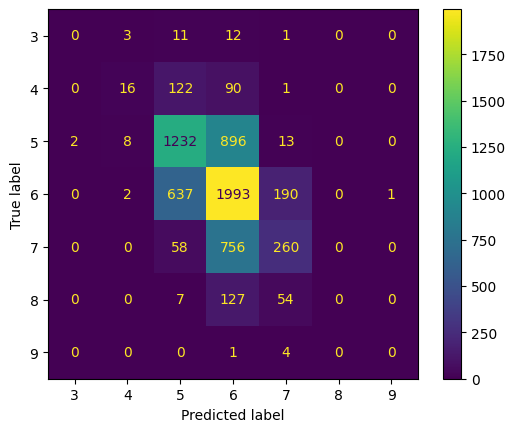

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_model_confusion_matrix,
                               display_labels=logistic_model.classes_)
disp.plot()

##Decision Tree

In [ ]:
tree_model=tree.DecisionTreeClassifier()

In [ ]:
params={'max_depth':[random.randint(2,20)]}

In [ ]:
search = GridSearchCV(tree_model, params, cv=5, scoring='accuracy')
search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [9]}, scoring='accuracy')

In [ ]:
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Best hyperparameters: {'max_depth': 9}
Best score: 0.6795062161458023


In [ ]:
tree_model=search.best_estimator_

In [ ]:
tree_predictions=tree_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,tree_predictions))

              precision    recall  f1-score   support

           3       1.00      0.04      0.07        27
           4       0.83      0.25      0.39       229
           5       0.71      0.73      0.72      2151
           6       0.64      0.78      0.71      2823
           7       0.70      0.45      0.55      1074
           8       0.77      0.27      0.40       188
           9       0.00      0.00      0.00         5

    accuracy                           0.67      6497
   macro avg       0.66      0.36      0.41      6497
weighted avg       0.68      0.67      0.66      6497



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tree_confusion_matrix=confusion_matrix(Y_test,tree_predictions)

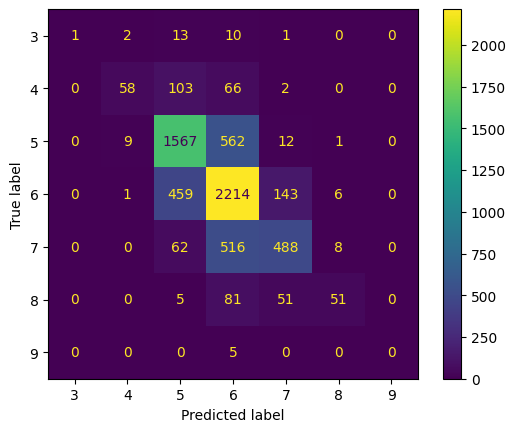

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=tree_confusion_matrix,
                               display_labels=tree_model.classes_)
disp.plot()

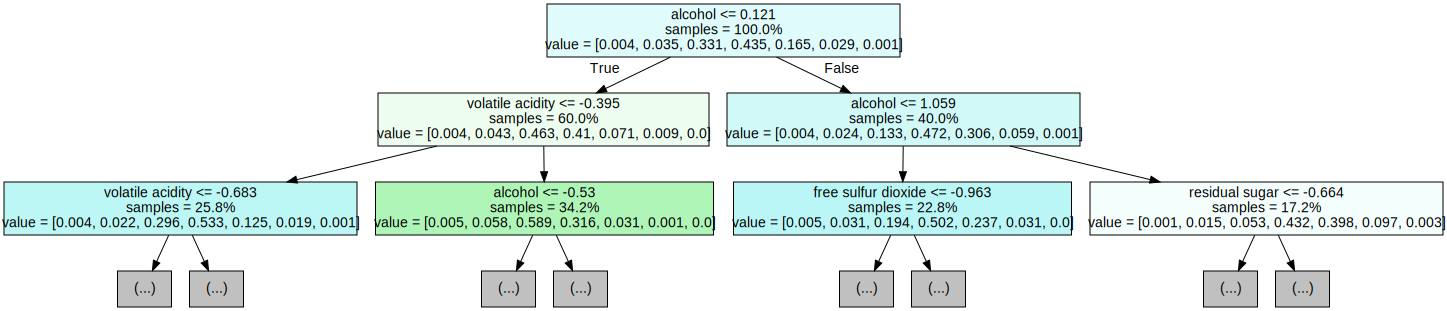

In [ ]:
dot_data = export_graphviz(tree_model,
                              feature_names=list(X.columns),
                              filled=True,
                              max_depth=2,
                              impurity=False,
                              proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

##Random Forest

In [ ]:
param_dist = {'n_estimators': [random.randint(50,300)],
              'max_depth': [random.randint(1,20)]}

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf_models = RandomizedSearchCV(rf,param_distributions = param_dist,n_iter=5,cv=5)
rf_models.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [14],
                                        'n_estimators': [179]})

In [ ]:
rf_model=rf_models.best_estimator_
print('Best hyperparameters:',  rf_models.best_params_)

Best hyperparameters: {'n_estimators': 179, 'max_depth': 14}


In [ ]:
rf_predictions=rf_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,rf_predictions))

              precision    recall  f1-score   support

           3       1.00      0.93      0.96        27
           4       0.99      0.93      0.96       229
           5       0.97      0.98      0.98      2151
           6       0.97      0.98      0.98      2823
           7       0.99      0.97      0.98      1074
           8       1.00      0.91      0.95       188
           9       1.00      0.80      0.89         5

    accuracy                           0.98      6497
   macro avg       0.99      0.93      0.96      6497
weighted avg       0.98      0.98      0.98      6497



In [ ]:
rf_confusion_matrix=confusion_matrix(Y_test,rf_predictions)

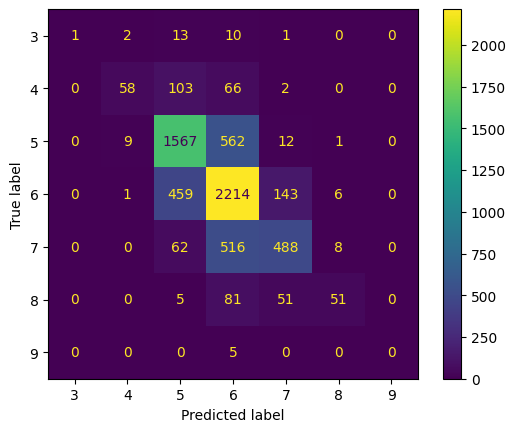

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix,
                               display_labels=rf_model.classes_)
disp.plot()

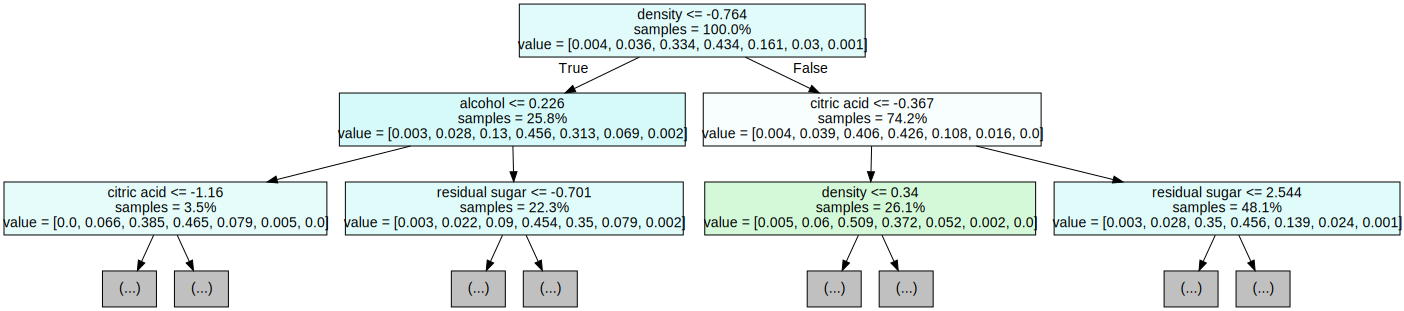

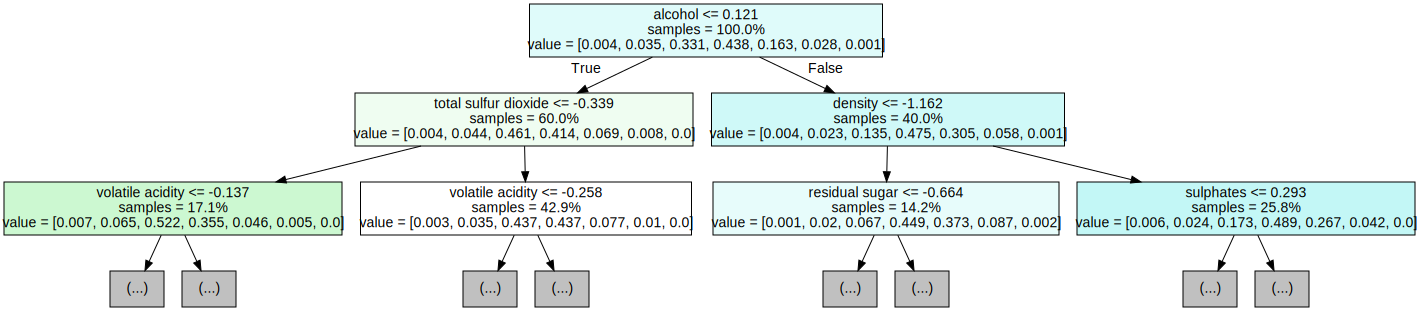

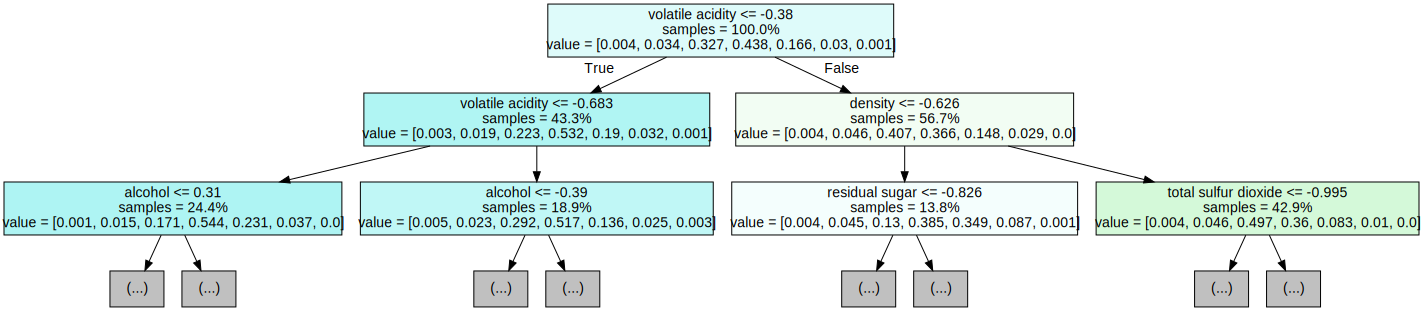

In [ ]:
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

##Support Vector Machines

In [ ]:
params_dictrionary = {'kernel':['poly', 'rbf']}

In [ ]:
svc_model=SVC()

In [ ]:
svc_grid_search=GridSearchCV(svc_model,params_dictrionary,cv=5)

In [ ]:
%%time
svc_grid_search.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

CPU times: user 6min 17s, sys: 983 ms, total: 6min 18s
Wall time: 6min 19s


GridSearchCV(cv=5, estimator=SVC(), param_grid={'kernel': ['poly', 'rbf']})

In [ ]:
svc_model=svc_grid_search.best_estimator_
print('Best hyperparameters:',  svc_grid_search.best_params_)

Best hyperparameters: {'kernel': 'rbf'}


In [ ]:
svc_predictions=svc_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,svc_predictions))

              precision    recall  f1-score   support

           3       1.00      0.26      0.41        27
           4       0.79      0.15      0.25       229
           5       0.69      0.70      0.69      2151
           6       0.59      0.78      0.67      2823
           7       0.64      0.33      0.44      1074
           8       0.71      0.03      0.05       188
           9       0.00      0.00      0.00         5

    accuracy                           0.63      6497
   macro avg       0.63      0.32      0.36      6497
weighted avg       0.64      0.63      0.61      6497



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc_confusion_matrix=confusion_matrix(Y_test,svc_predictions)

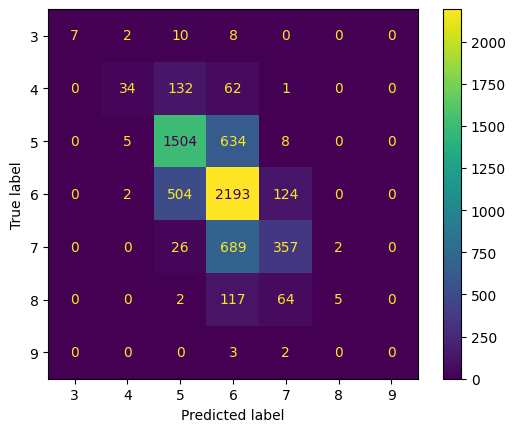

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svc_confusion_matrix,
                               display_labels=svc_model.classes_)
disp.plot()

##Naïve Bayes

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
nb_predictions=nb_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,nb_predictions))

              precision    recall  f1-score   support

           3       0.09      0.30      0.13        27
           4       0.18      0.07      0.10       229
           5       0.53      0.41      0.46      2151
           6       0.45      0.33      0.38      2823
           7       0.27      0.15      0.19      1074
           8       0.24      0.12      0.16       188
           9       0.00      0.80      0.00         5

    accuracy                           0.31      6497
   macro avg       0.25      0.31      0.20      6497
weighted avg       0.43      0.31      0.36      6497



In [ ]:
nb_confusion_matrix=confusion_matrix(Y_test,nb_predictions)

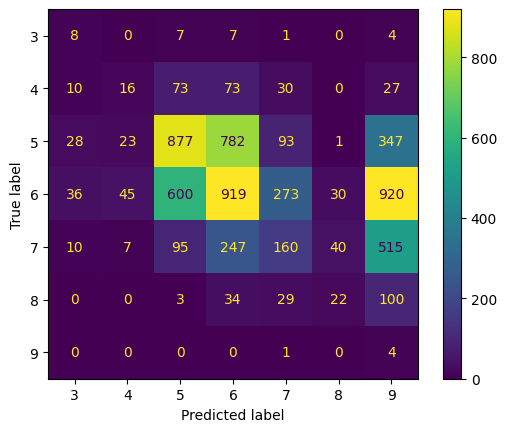

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix,
                               display_labels=nb_model.classes_)
disp.plot()

##AdaBoost Classifier(on above nb model)

In [ ]:
ada_model=AdaBoostClassifier(n_estimators=100, random_state=0,base_estimator=nb_model)

In [ ]:
ada_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=100,
                   random_state=0)

In [ ]:
ada_predictions=ada_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,ada_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        27
           4       0.21      0.03      0.05       229
           5       0.57      0.31      0.40      2151
           6       0.46      0.67      0.54      2823
           7       0.35      0.36      0.36      1074
           8       0.11      0.04      0.06       188
           9       0.00      0.00      0.00         5

    accuracy                           0.46      6497
   macro avg       0.24      0.20      0.20      6497
weighted avg       0.46      0.46      0.43      6497



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ada_confusion_matrix=confusion_matrix(Y_test,ada_predictions)

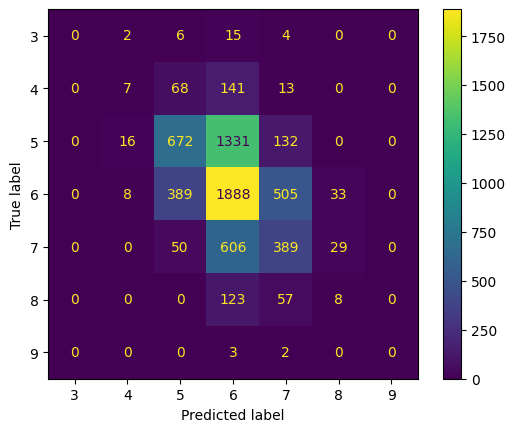

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=ada_confusion_matrix,
                               display_labels=ada_model.classes_)
disp.plot()

##XGBoost

In [9]:
xgb_model=XGBClassifier(objective="multi:softprob", random_state=42)

In [12]:
le=LabelEncoder()

In [13]:
xgb_model.fit(X_train,le.fit_transform(Y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [14]:
xgb_predictions=le.inverse_transform(xgb_model.predict(X_test))

In [15]:
print(classification_report(Y_test,xgb_predictions))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        27
           4       0.99      0.99      0.99       229
           5       0.97      0.96      0.97      2151
           6       0.96      0.97      0.97      2823
           7       0.98      0.96      0.97      1074
           8       0.99      0.96      0.98       188
           9       1.00      0.80      0.89         5

    accuracy                           0.97      6497
   macro avg       0.98      0.95      0.97      6497
weighted avg       0.97      0.97      0.97      6497



In [16]:
xgb_confusion_matrix=confusion_matrix(Y_test,xgb_predictions)

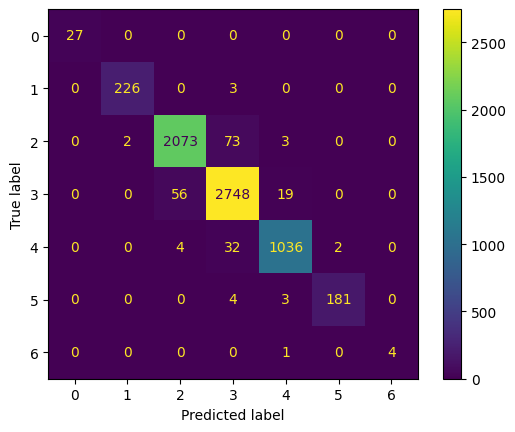

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_confusion_matrix,
                               display_labels=xgb_model.classes_)
disp.plot()